<a href="https://colab.research.google.com/github/disha2sinha/Movie-Recommendation-System/blob/master/Analysis_of_The_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#https://drive.google.com/file/d/1HcaON_5Qz-bfqlRyDgVWfdS4bD0hQ0Z3/view?usp=sharing

**DATASET :**

In [3]:
id='1HcaON_5Qz-bfqlRyDgVWfdS4bD0hQ0Z3'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('MoviesData.csv')  
movies_data = pd.read_csv('MoviesData.csv',engine='python',index_col=0)
movies_data.head()

title release_year  ... rating_count mean_rating
0                    Se7en         1995  ...      91921.0    4.052926
1                   Batman         1989  ...      91082.0    4.429015
2  The Empire Strikes Back         1980  ...      87901.0    4.169975
3          Drag Me to Hell         2009  ...      84078.0    4.152246
4                  Suspect         1987  ...      77960.0    4.154098

[5 rows x 21 columns]

In [4]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45663 entries, 0 to 45662
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 45663 non-null  object 
 1   release_year          45663 non-null  object 
 2   release_day           45663 non-null  object 
 3   genres                43221 non-null  object 
 4   original_language     45535 non-null  object 
 5   runtime               45663 non-null  float64
 6   content               44717 non-null  object 
 7   production_companies  33739 non-null  object 
 8   budget                45663 non-null  int64  
 9   revenue               45663 non-null  float64
 10  profit                45663 non-null  float64
 11  production_countries  39361 non-null  object 
 12  status                45663 non-null  object 
 13  popularity            45663 non-null  float64
 14  vote_average          45663 non-null  float64
 15  vote_count         

**REMOVING NULL AND SOME ODD VALUES FROM THE DATASET :**

In [5]:
movies_data=movies_data.replace(np.nan,'Unknown',regex=True)
movies_data['release_year']=movies_data['release_year'].replace('NaT','1874',regex=True)

In [6]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45663 entries, 0 to 45662
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 45663 non-null  object 
 1   release_year          45663 non-null  object 
 2   release_day           45663 non-null  object 
 3   genres                45663 non-null  object 
 4   original_language     45663 non-null  object 
 5   runtime               45663 non-null  float64
 6   content               45663 non-null  object 
 7   production_companies  45663 non-null  object 
 8   budget                45663 non-null  int64  
 9   revenue               45663 non-null  float64
 10  profit                45663 non-null  float64
 11  production_countries  45663 non-null  object 
 12  status                45663 non-null  object 
 13  popularity            45663 non-null  float64
 14  vote_average          45663 non-null  float64
 15  vote_count         

# **::DATA VISUALIZATION AND ANALYSIS ::**

In [7]:
def count_types(data,column,array):
  type_count=dict()
  for item in array:
    type_count[item]=0
  for types in movies_data[column].str.split('|'):
    for item in types: 
      type_count[item] += 1
  type_occurences = []
  for k,v in type_count.items():
    type_occurences.append([k,v])
  type_occurences.sort(key = lambda x:x[1], reverse = True)
  return type_occurences

**DISTRIBUTION OF GENRES IN THE DATASET:** We will plot the various unique genres and get an idea of how many movies in the dataset have those genres.

In [8]:
genre_set = set()
for genre in movies_data['genres'].str.split('|').values:
  genre_set = genre_set.union(set(genre))
genre_type_occurences= count_types(movies_data, 'genres', genre_set)
len(genre_type_occurences)


21

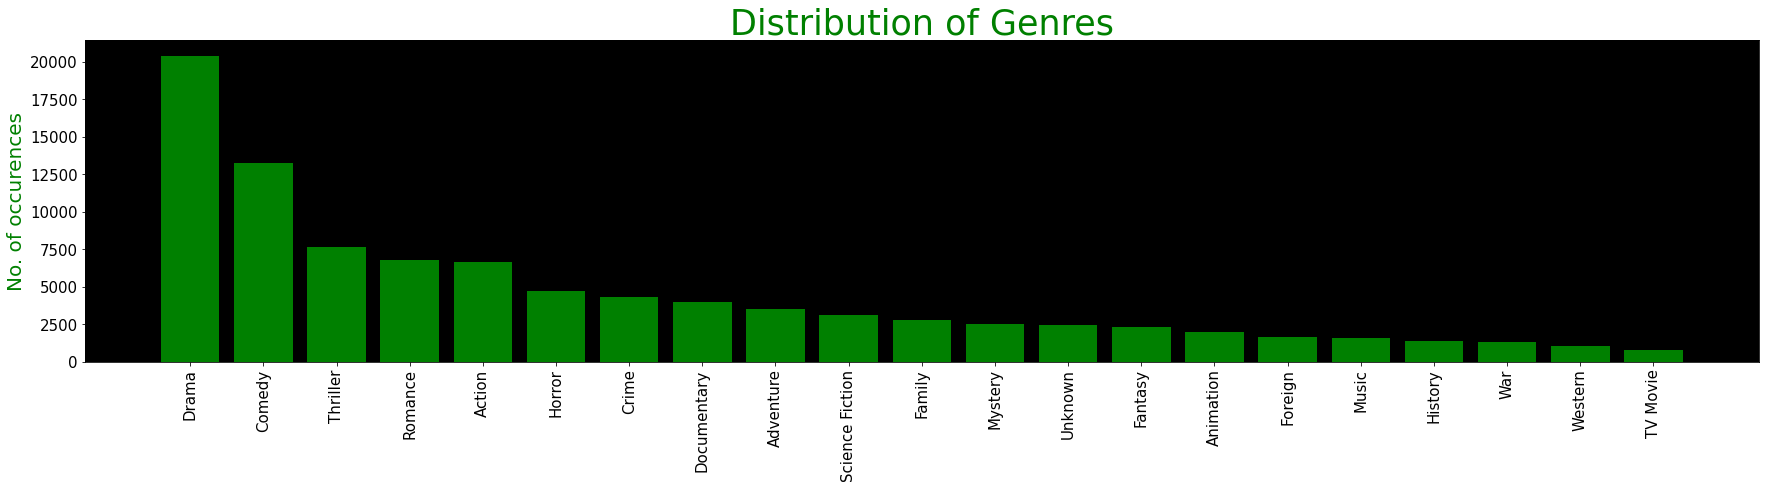

In [9]:
fig = plt.figure(1, figsize=(30,13),facecolor='w')
genre_plot = fig.add_subplot(2,1,2)
genre_plot.set_facecolor((0,0,0))
y_axis = [i[1] for i in genre_type_occurences]
x_axis = [k for k,i in enumerate(genre_type_occurences)]
x_label = [i[0] for i in genre_type_occurences]
plt.xticks(color='k',rotation=90, fontsize = 15)
plt.yticks(fontsize = 15,color='k')
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 20,color='g')
genre_plot.bar(x_axis, y_axis, color='g')
plt.title("Distribution of Genres",color='g',fontsize = 35)
plt.savefig('Genres_Distribution.jpg')
plt.show()

So seeing the bar plot..it's clear that most movies belong to the 'Drama' genre.

 **DISTRIBUTION OF PRODUCTION COUNTRIES IN THE DATASET:** WordCloud is used to see the distribution of countries whose movies are in the dataset.

In [10]:
PH_set = set()
for PH in movies_data['production_countries'].str.split('|').values:
  PH_set = PH_set.union(set(PH))
PHtype_occurences= count_types(movies_data, 'production_countries', PH_set)
len(PHtype_occurences)


161

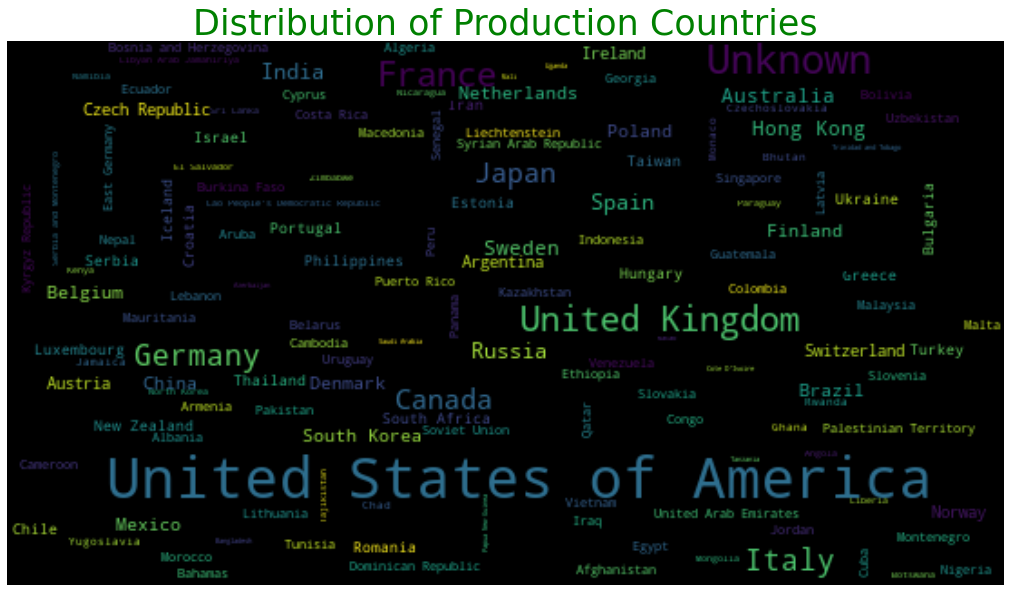

In [11]:
countries = dict()
for s in PHtype_occurences:
    countries[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(30, 10))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.4,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(countries)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribution of Production Countries",color='g',fontsize = 35)
plt.axis('off')
plt.savefig('PC_Distribution.jpg')

plt.show()

From the plot..it's clear that movies of 'United States of Kingdom' is huge in numbers. Also there are many movies in the dataset whose country of origin is unknown

 **DISTRIBUTION OF PRODUCTION COMPANIES IN THE DATASET:** WordCloud is used to see the distribution of PHs whose movies are in the dataset.

In [12]:
PHc_set = set()
for PHc in movies_data['production_companies'].str.split('|').values:
  PHc_set = PHc_set.union(set(PHc))
PHctype_occurences= count_types(movies_data, 'production_companies', PHc_set)
len(PHctype_occurences)


23536

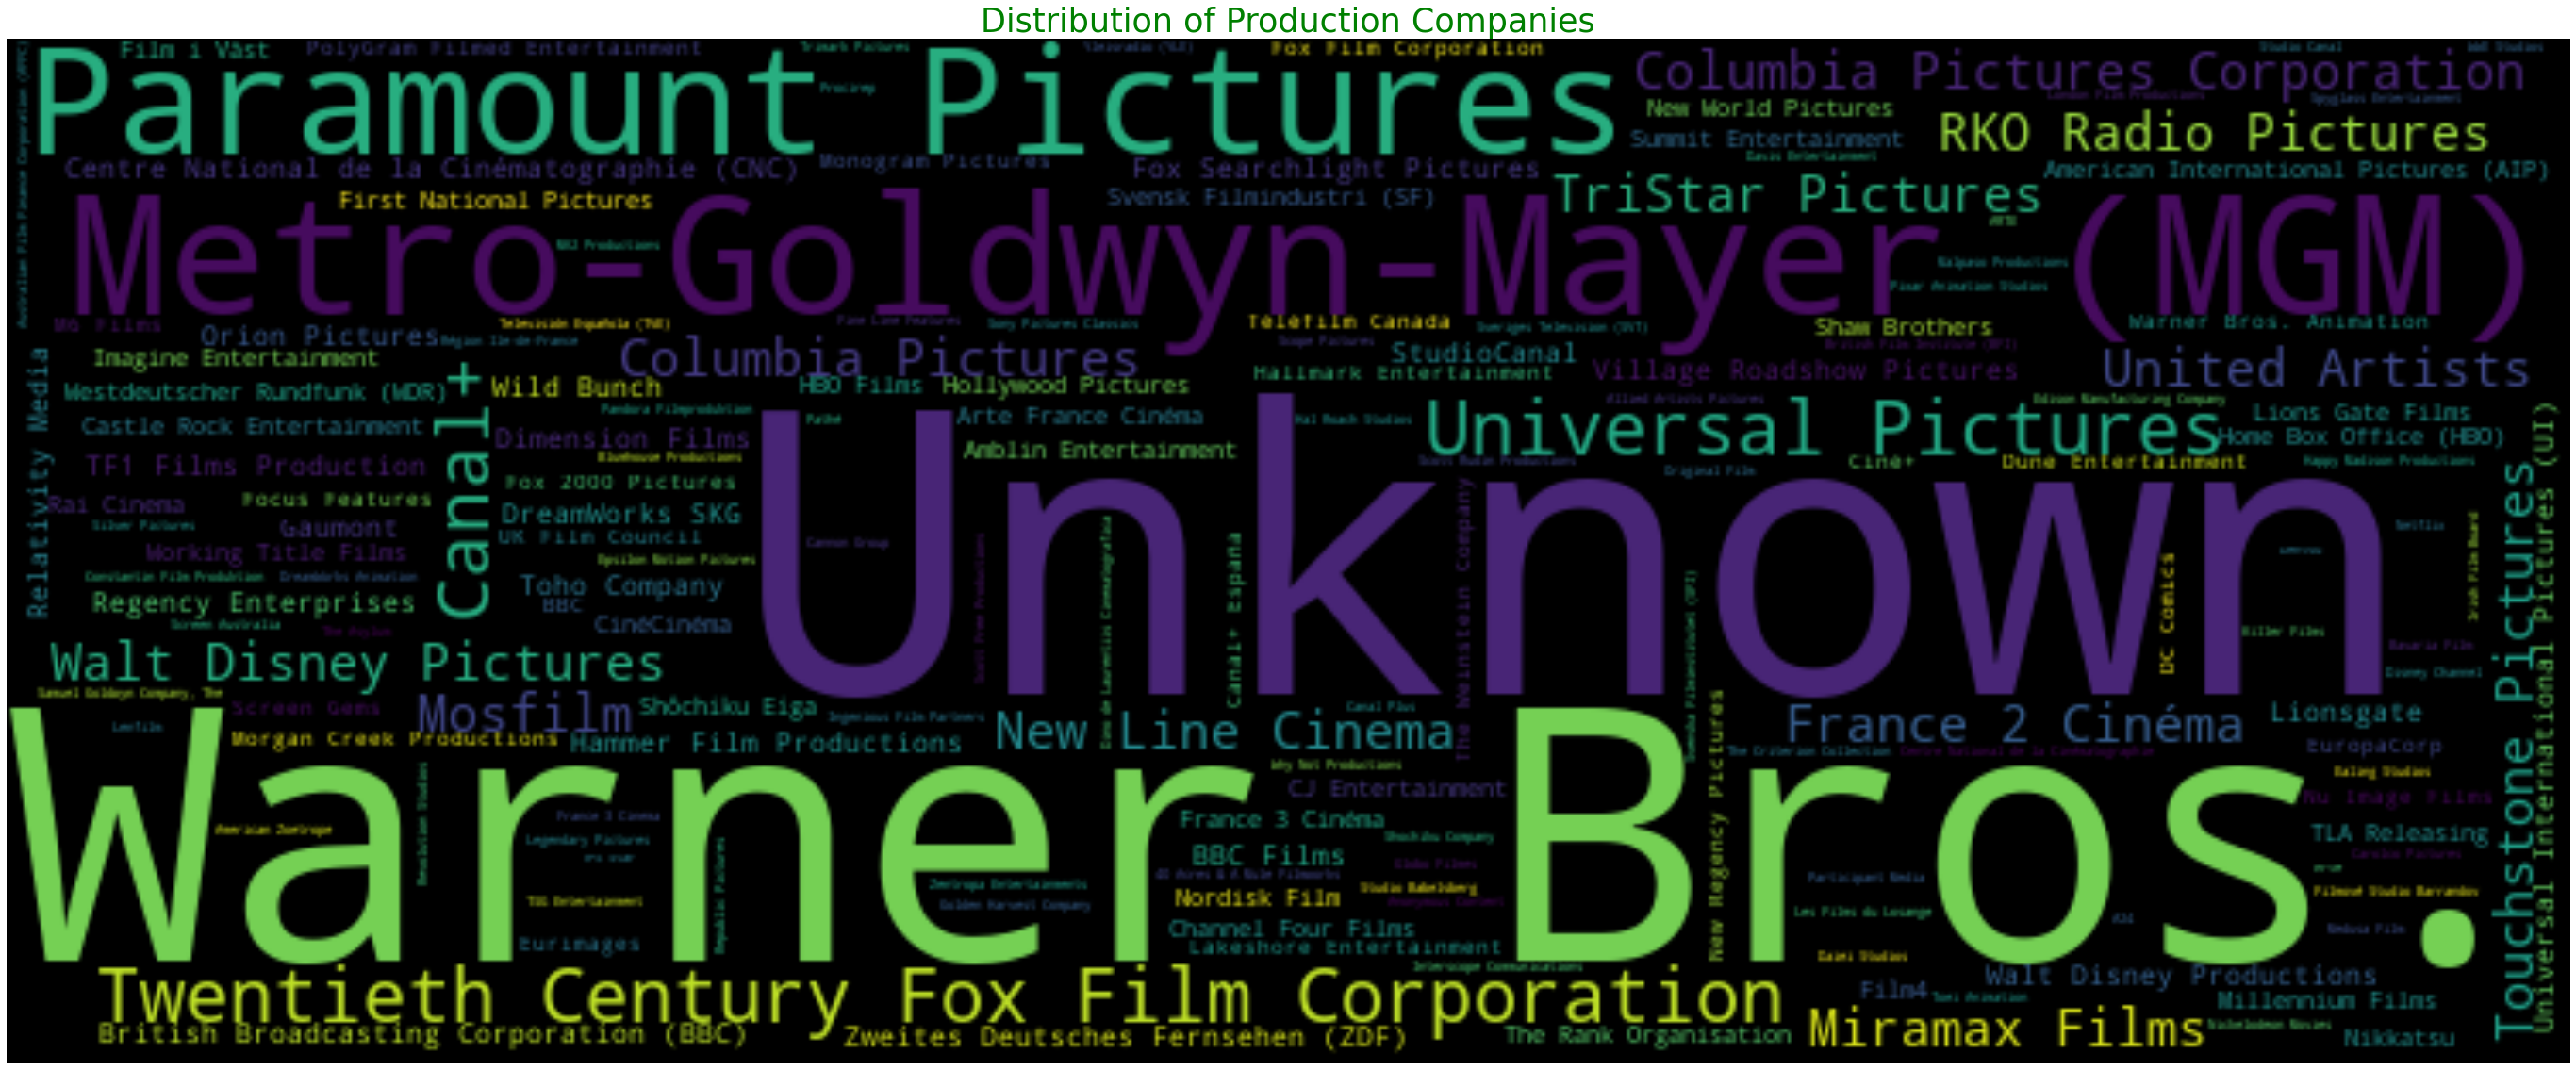

In [13]:
companies = dict()
for s in PHctype_occurences:
    companies[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(50, 20))
wordcloud = WordCloud(width=750,height=300, background_color='black', 
                      max_words=23412,relative_scaling=0.1,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(companies)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribution of Production Companies",color='g',fontsize = 35)
plt.axis('off')
plt.savefig('PH_Distribution.jpg')
plt.show()

From the wordcloud it's clear that huge number of movies belong to 'Warner Bros' and also PHs of huge number of movies are unknown.

 **DISTRIBUTION OF YEAR OF RELEASE IN THE DATASET:**

In [14]:
year_set = set()
for year in movies_data['release_year'].str.split('|').values:
  year_set = year_set.union(set(year))
year_type_occurences= count_types(movies_data, 'release_year', year_set)
len(year_type_occurences)


135

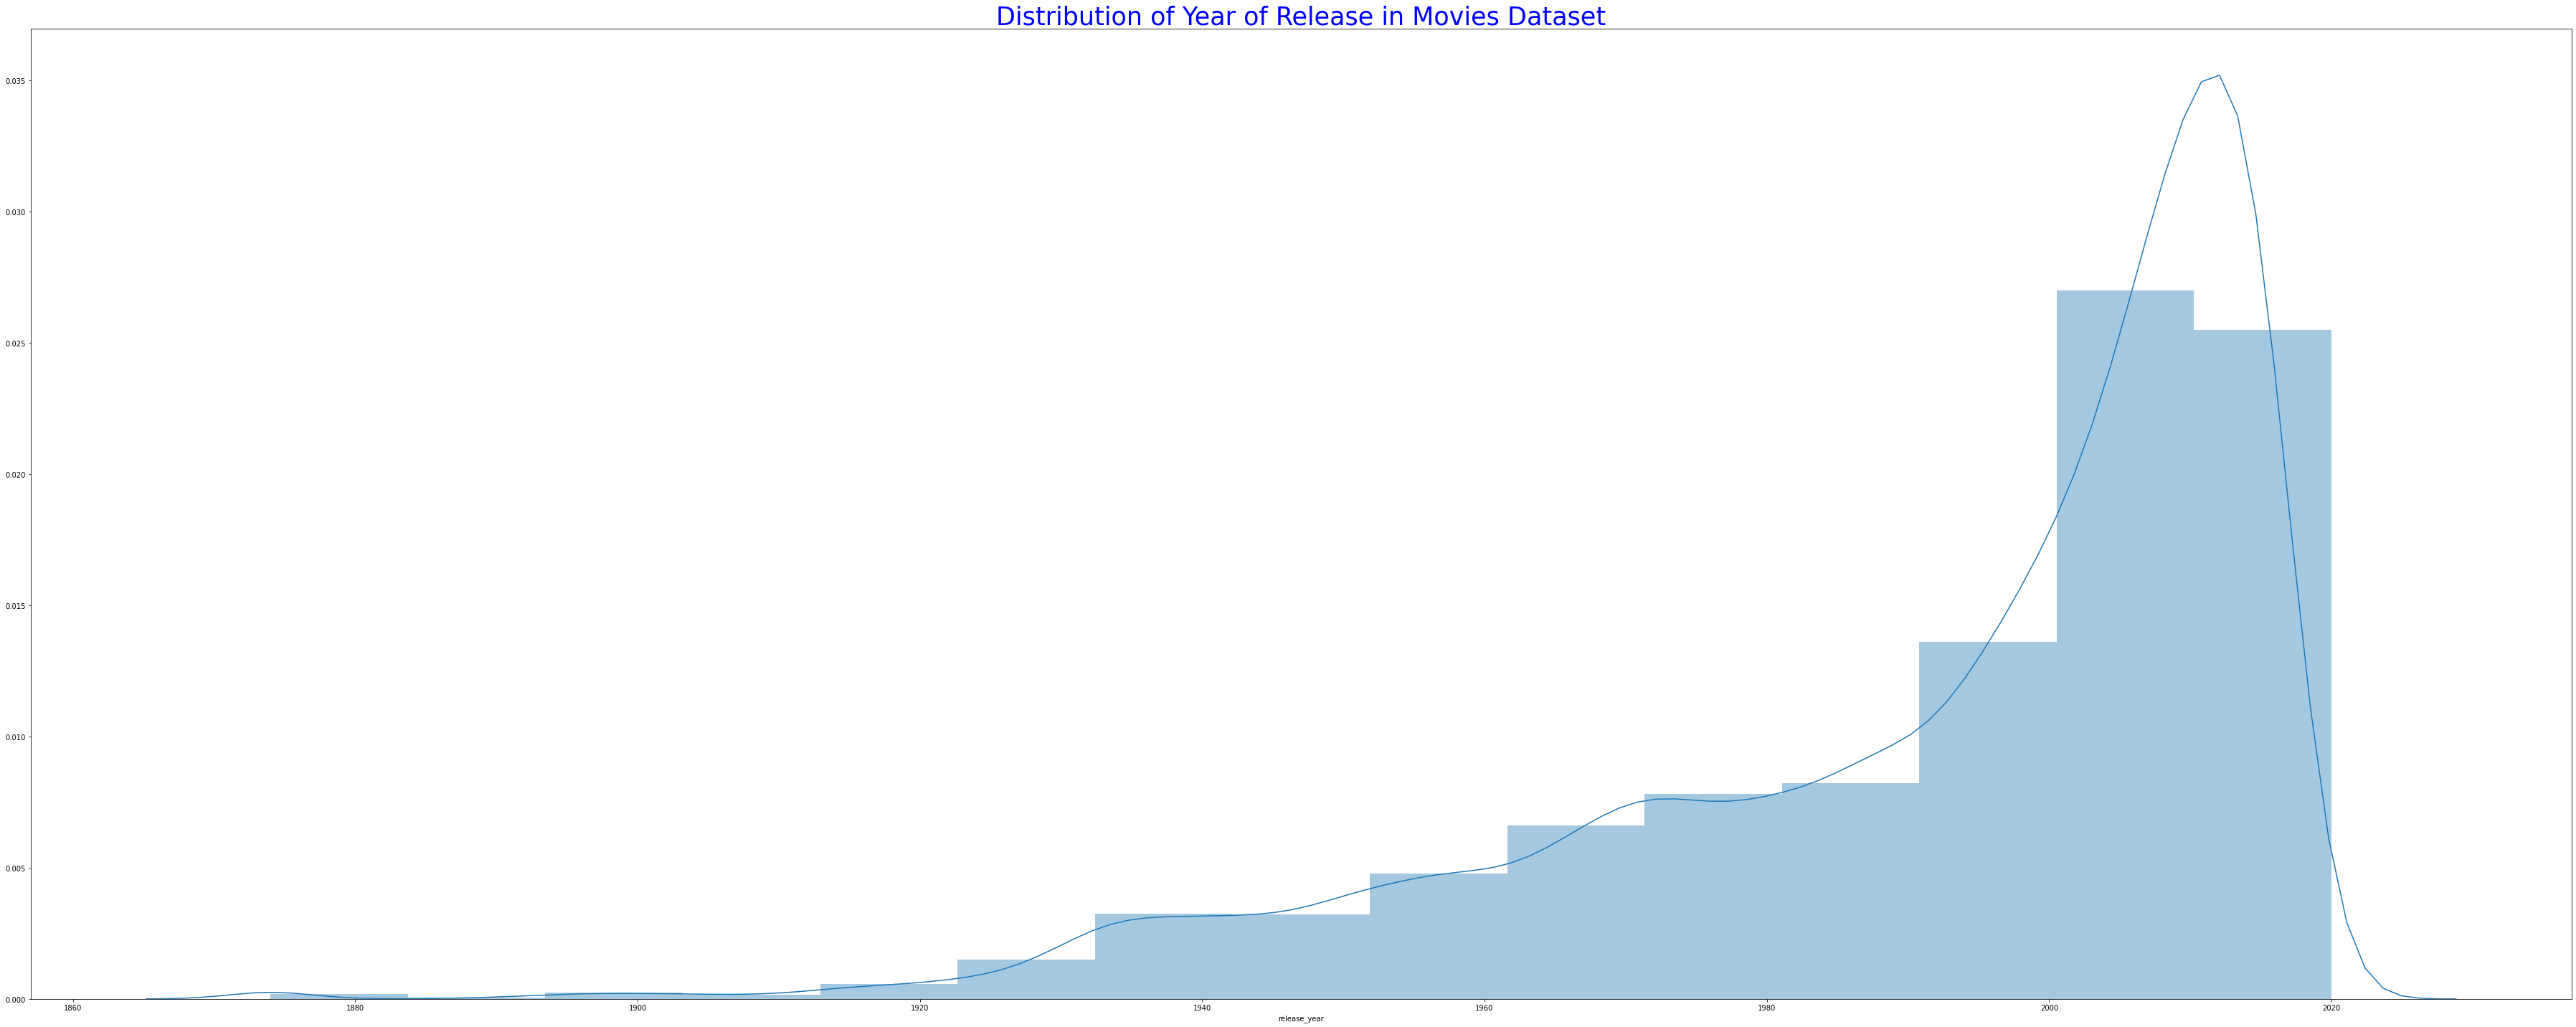

In [15]:
fig, axes = plt.subplots(figsize=(50, 20))
sns.distplot(movies_data['release_year'],bins=15)
plt.title("Distribution of Year of Release in Movies Dataset",color='b',fontsize = 35)
plt.savefig('Year_Distribution.jpg')
plt.tight_layout()

So most of the movies are from the period '2000' to '2020'.

 **DISTRIBUTION OF DAY OF RELEASE IN THE DATASET:**

In [16]:
day_set = set()
for day in movies_data['release_day'].str.split('|').values:
  day_set = day_set.union(set(day))
day_type_occurences= count_types(movies_data, 'release_day', day_set)

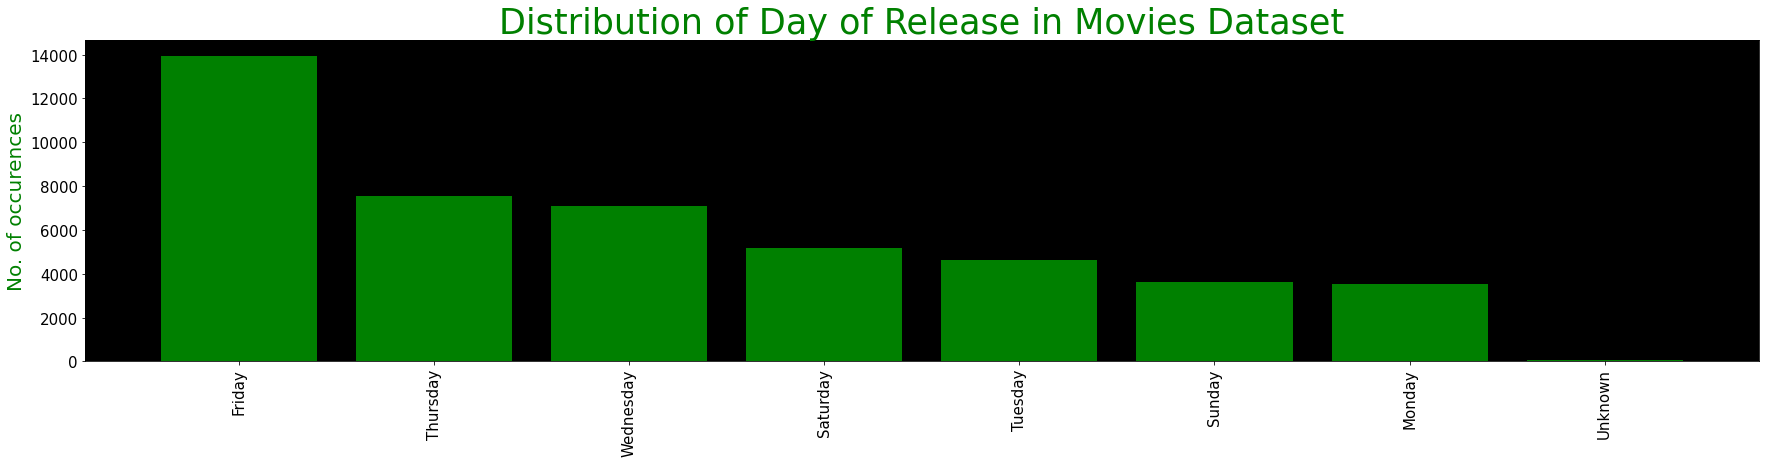

In [17]:
fig = plt.figure(1, figsize=(30,13),facecolor='w')
day_plot = fig.add_subplot(2,1,2)
day_plot.set_facecolor((0,0,0))
y_axis = [i[1] for i in day_type_occurences]
x_axis = [k for k,i in enumerate(day_type_occurences)]
x_label = [i[0] for i in day_type_occurences]
plt.xticks(color='k',rotation=90, fontsize = 15)
plt.yticks(fontsize = 15,color='k')
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 20,color='g')
day_plot.bar(x_axis, y_axis, color='g')
plt.title("Distribution of Day of Release in Movies Dataset",color='g',fontsize = 35)
plt.savefig('Days_Distribution.jpg')
plt.show()

Most of the movies in the dataset released on Friday

 **DISTRIBUTION OF ACTORS IN THE DATASET:** WordCloud is used to see the distribution of actors whose movies are in the dataset.

In [18]:
actor_set = set()
for actor in movies_data['cast'].str.split('|').values:
  actor_set = actor_set.union(set(actor))
actor_type_occurences= count_types(movies_data, 'cast', actor_set)
len(actor_type_occurences)


202731

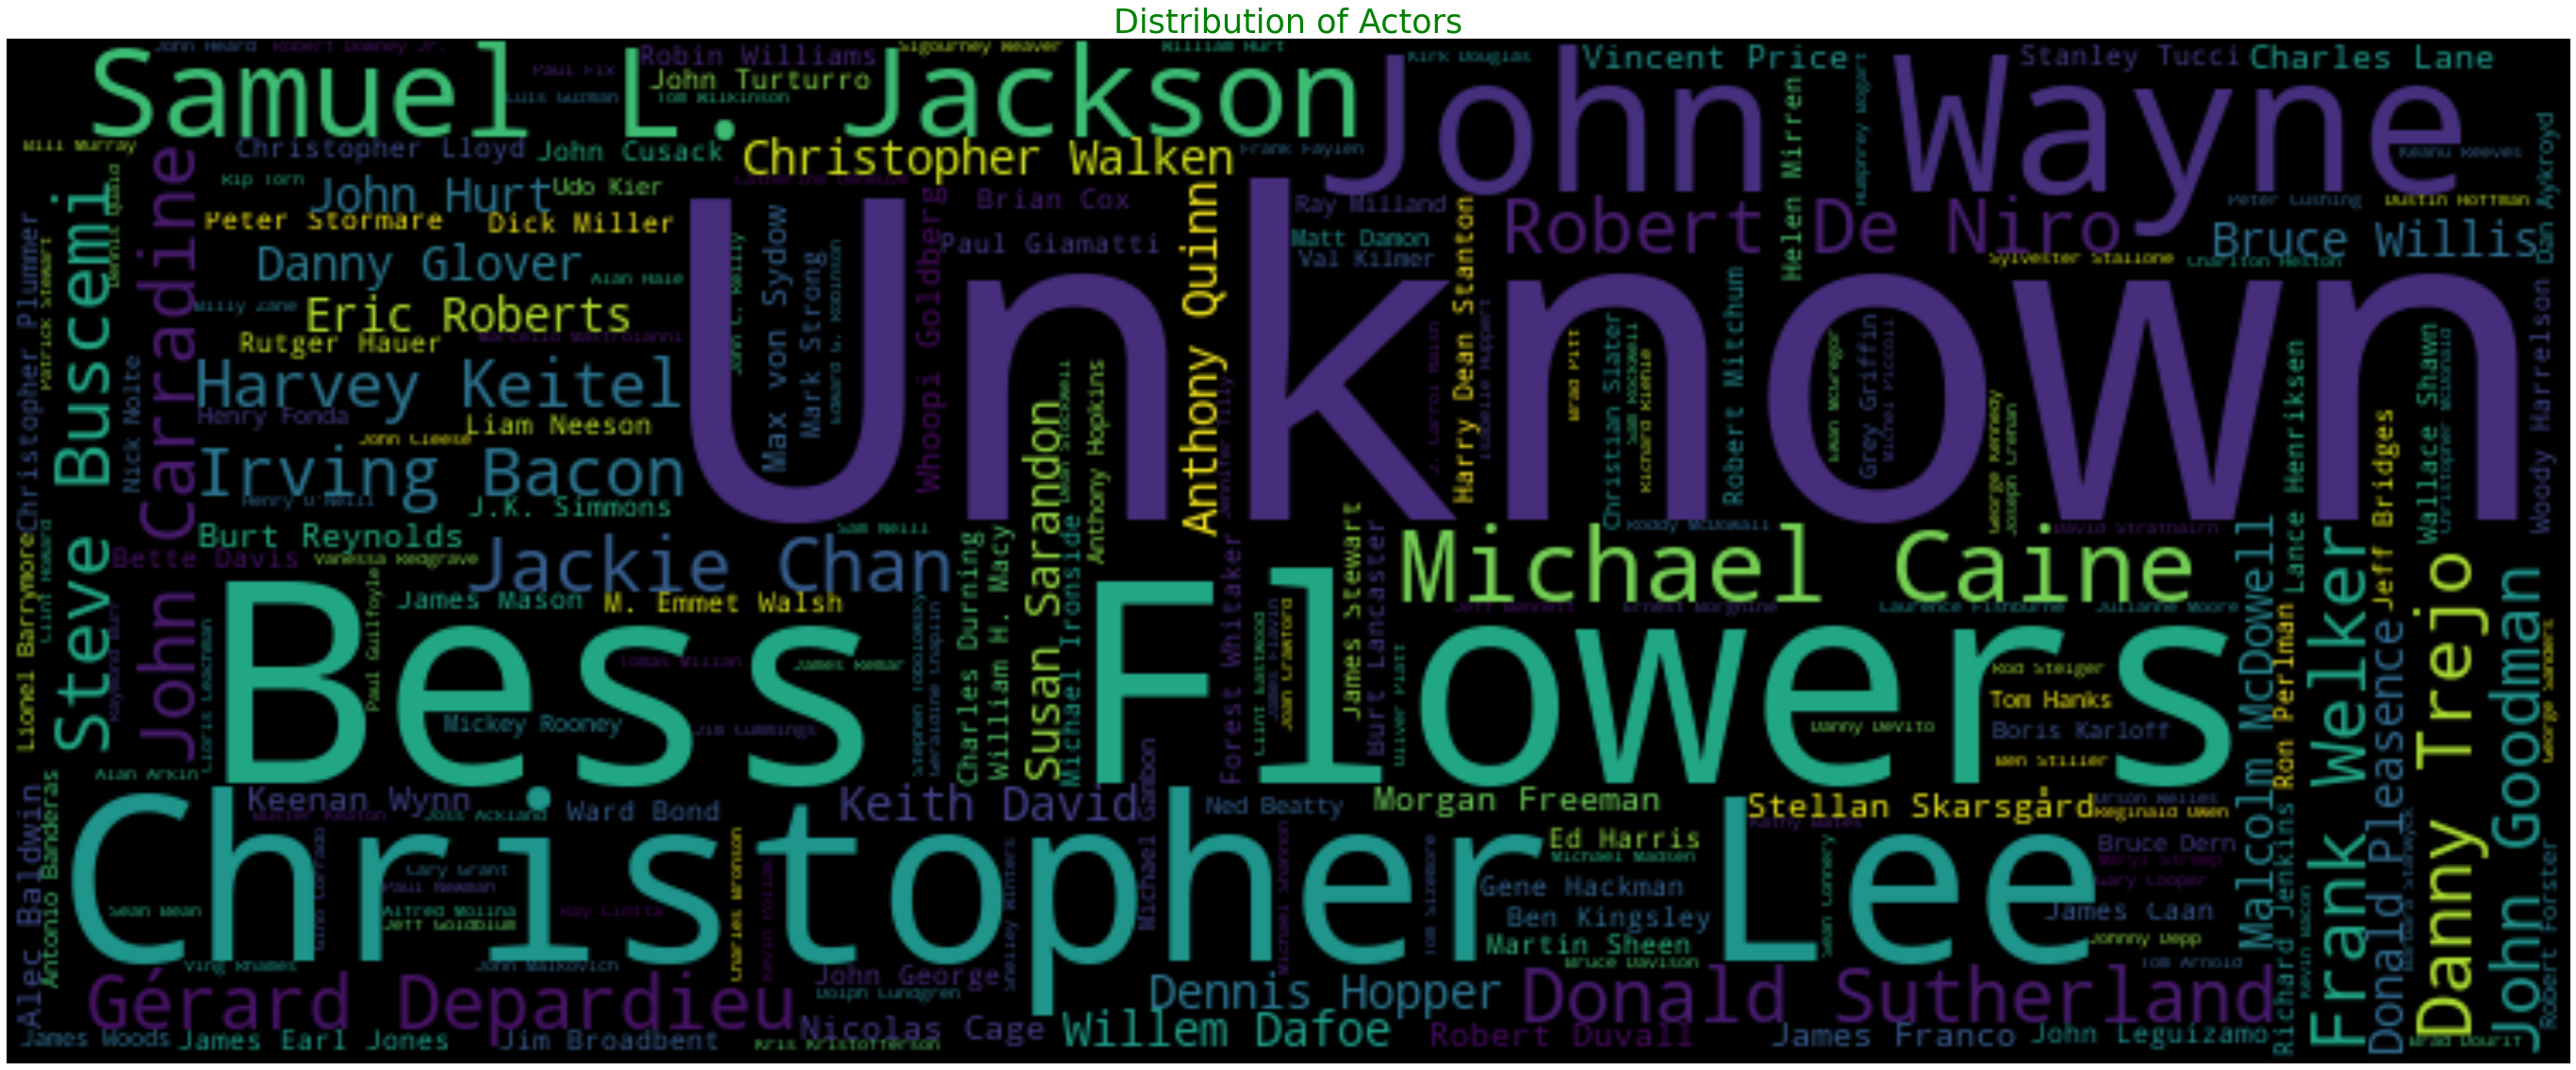

In [19]:
actors = dict()
for s in actor_type_occurences:
    actors[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(50, 20))
wordcloud = WordCloud(width=750,height=300, background_color='black', 
                      max_words=201644,relative_scaling=0.4,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(actors)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribution of Actors",color='g',fontsize = 35)
plt.axis('off')
plt.savefig('Actors_Distribution.jpg')
plt.show()

Trying to search for **Hrithik Roshan** in the wordcloud. Seems there are very less of his movies here! :(

In [20]:
def types_count(data,column,array):
  type_count=dict()
  for item in array:
    type_count[item]=0
  for types in movies_data[column]:
    type_count[types] += 1
  type_occurences = []
  for k,v in type_count.items():
    type_occurences.append([k,v])
  type_occurences.sort(key = lambda x:x[1], reverse = True)
  return type_occurences

 **DISTRIBUTION OF DIRECTORS IN THE DATASET:** WordCloud is used to see the distribution of Directors whose movies are in the dataset.

In [21]:
director_list = []
for director in movies_data['director'].unique():
  director_list.append(director)
director_type_occurences= count_types(movies_data, 'director', director_list)
len(director_type_occurences)


17572

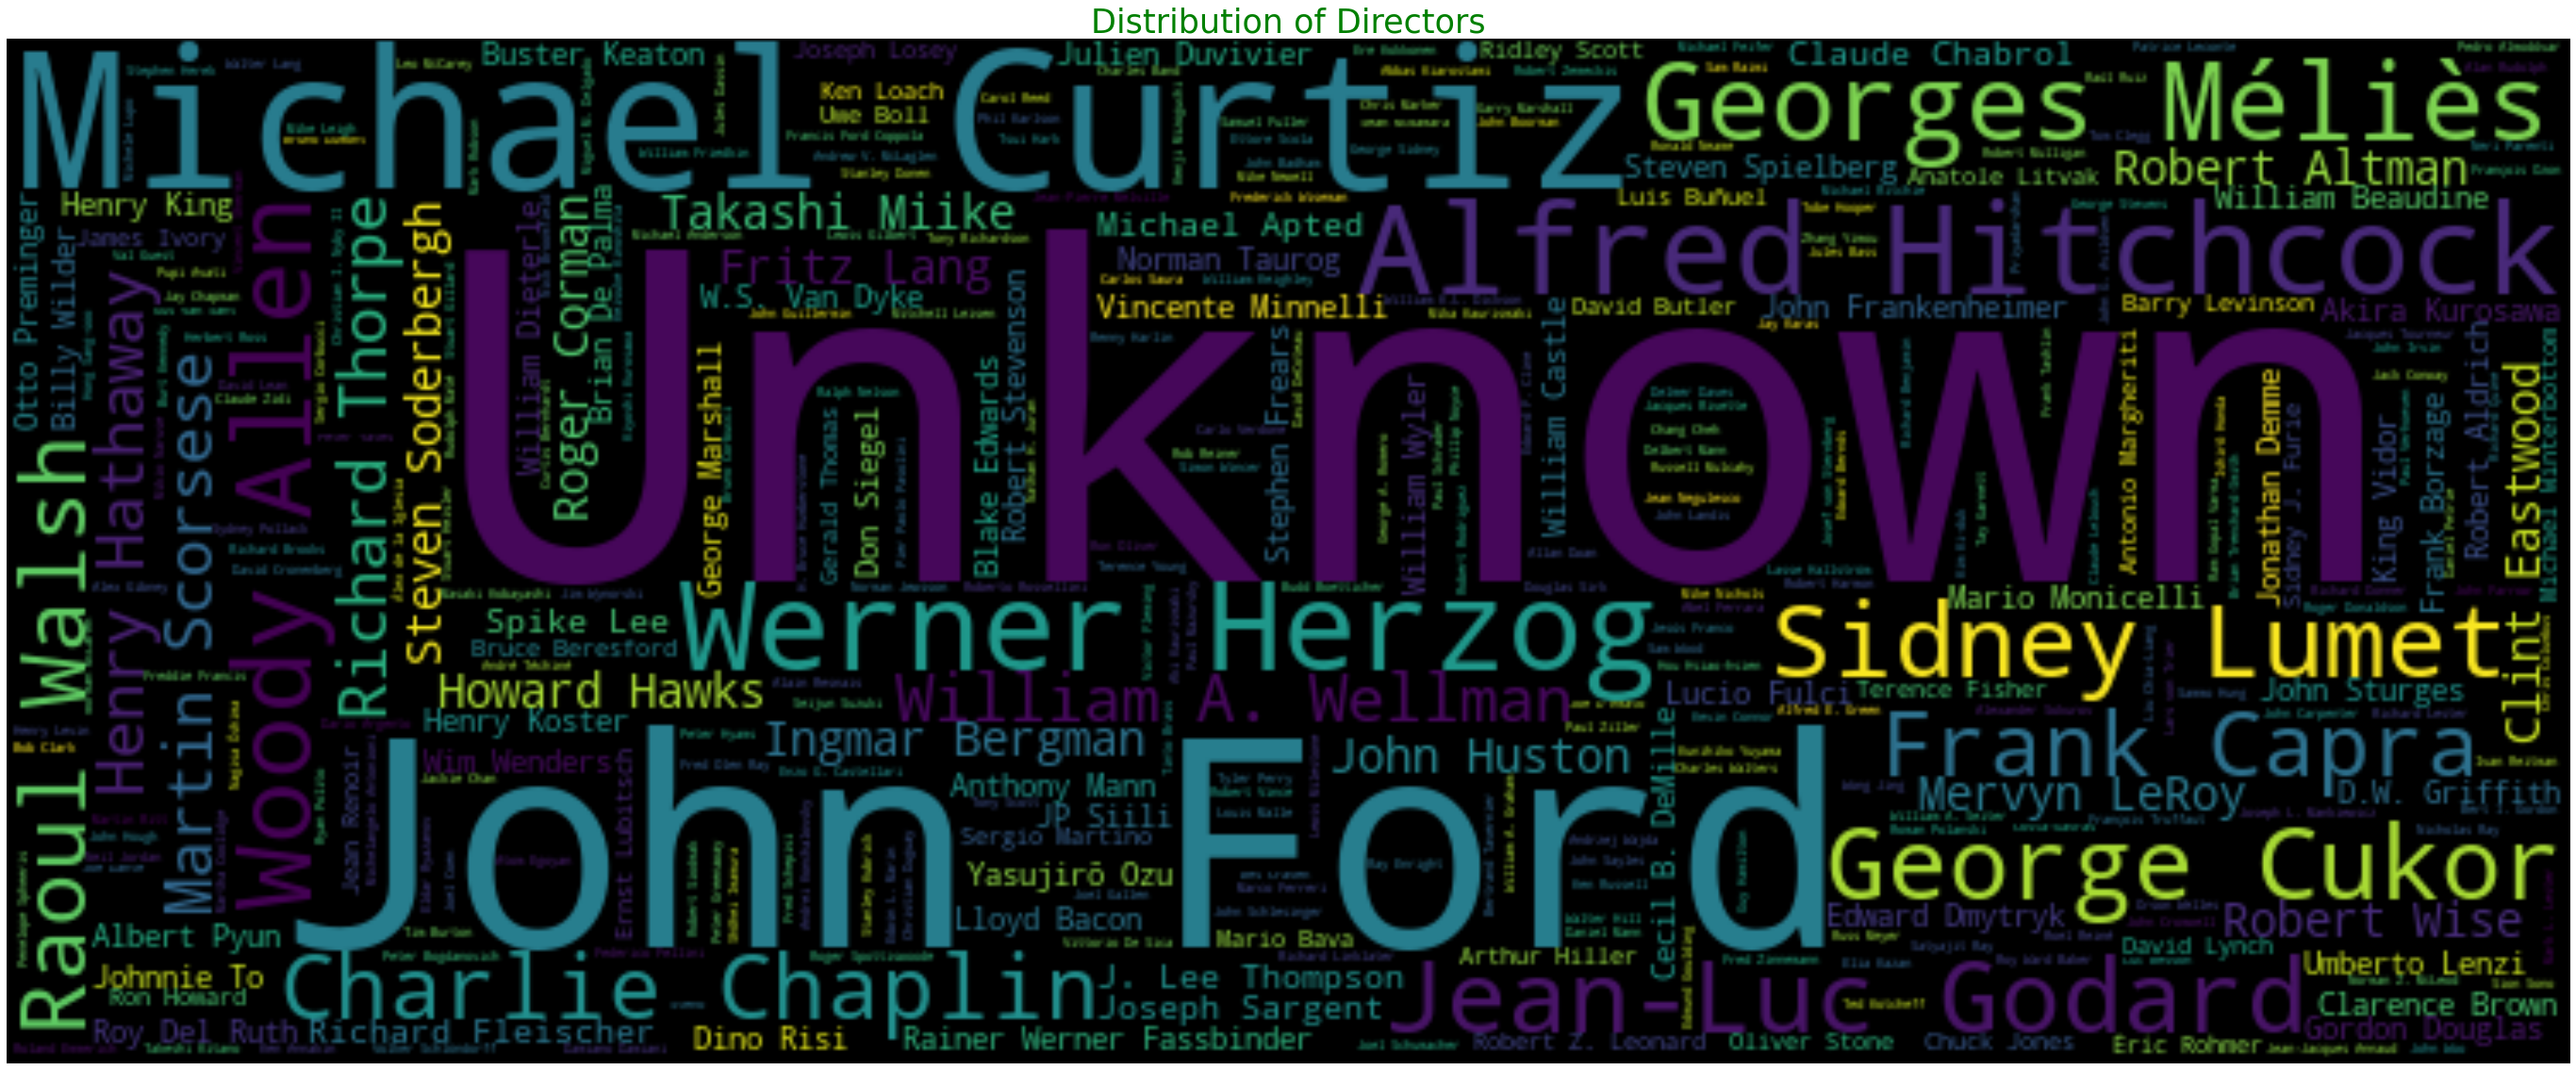

In [22]:
directors = dict()
for s in director_type_occurences:
    directors[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(50, 20))
wordcloud = WordCloud(width=750,height=300, background_color='black', 
                      max_words=17435,relative_scaling=0.4,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(directors)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribution of Directors",color='g',fontsize = 35)
plt.axis('off')
plt.savefig('Directors_Distribution.jpg')
plt.show()

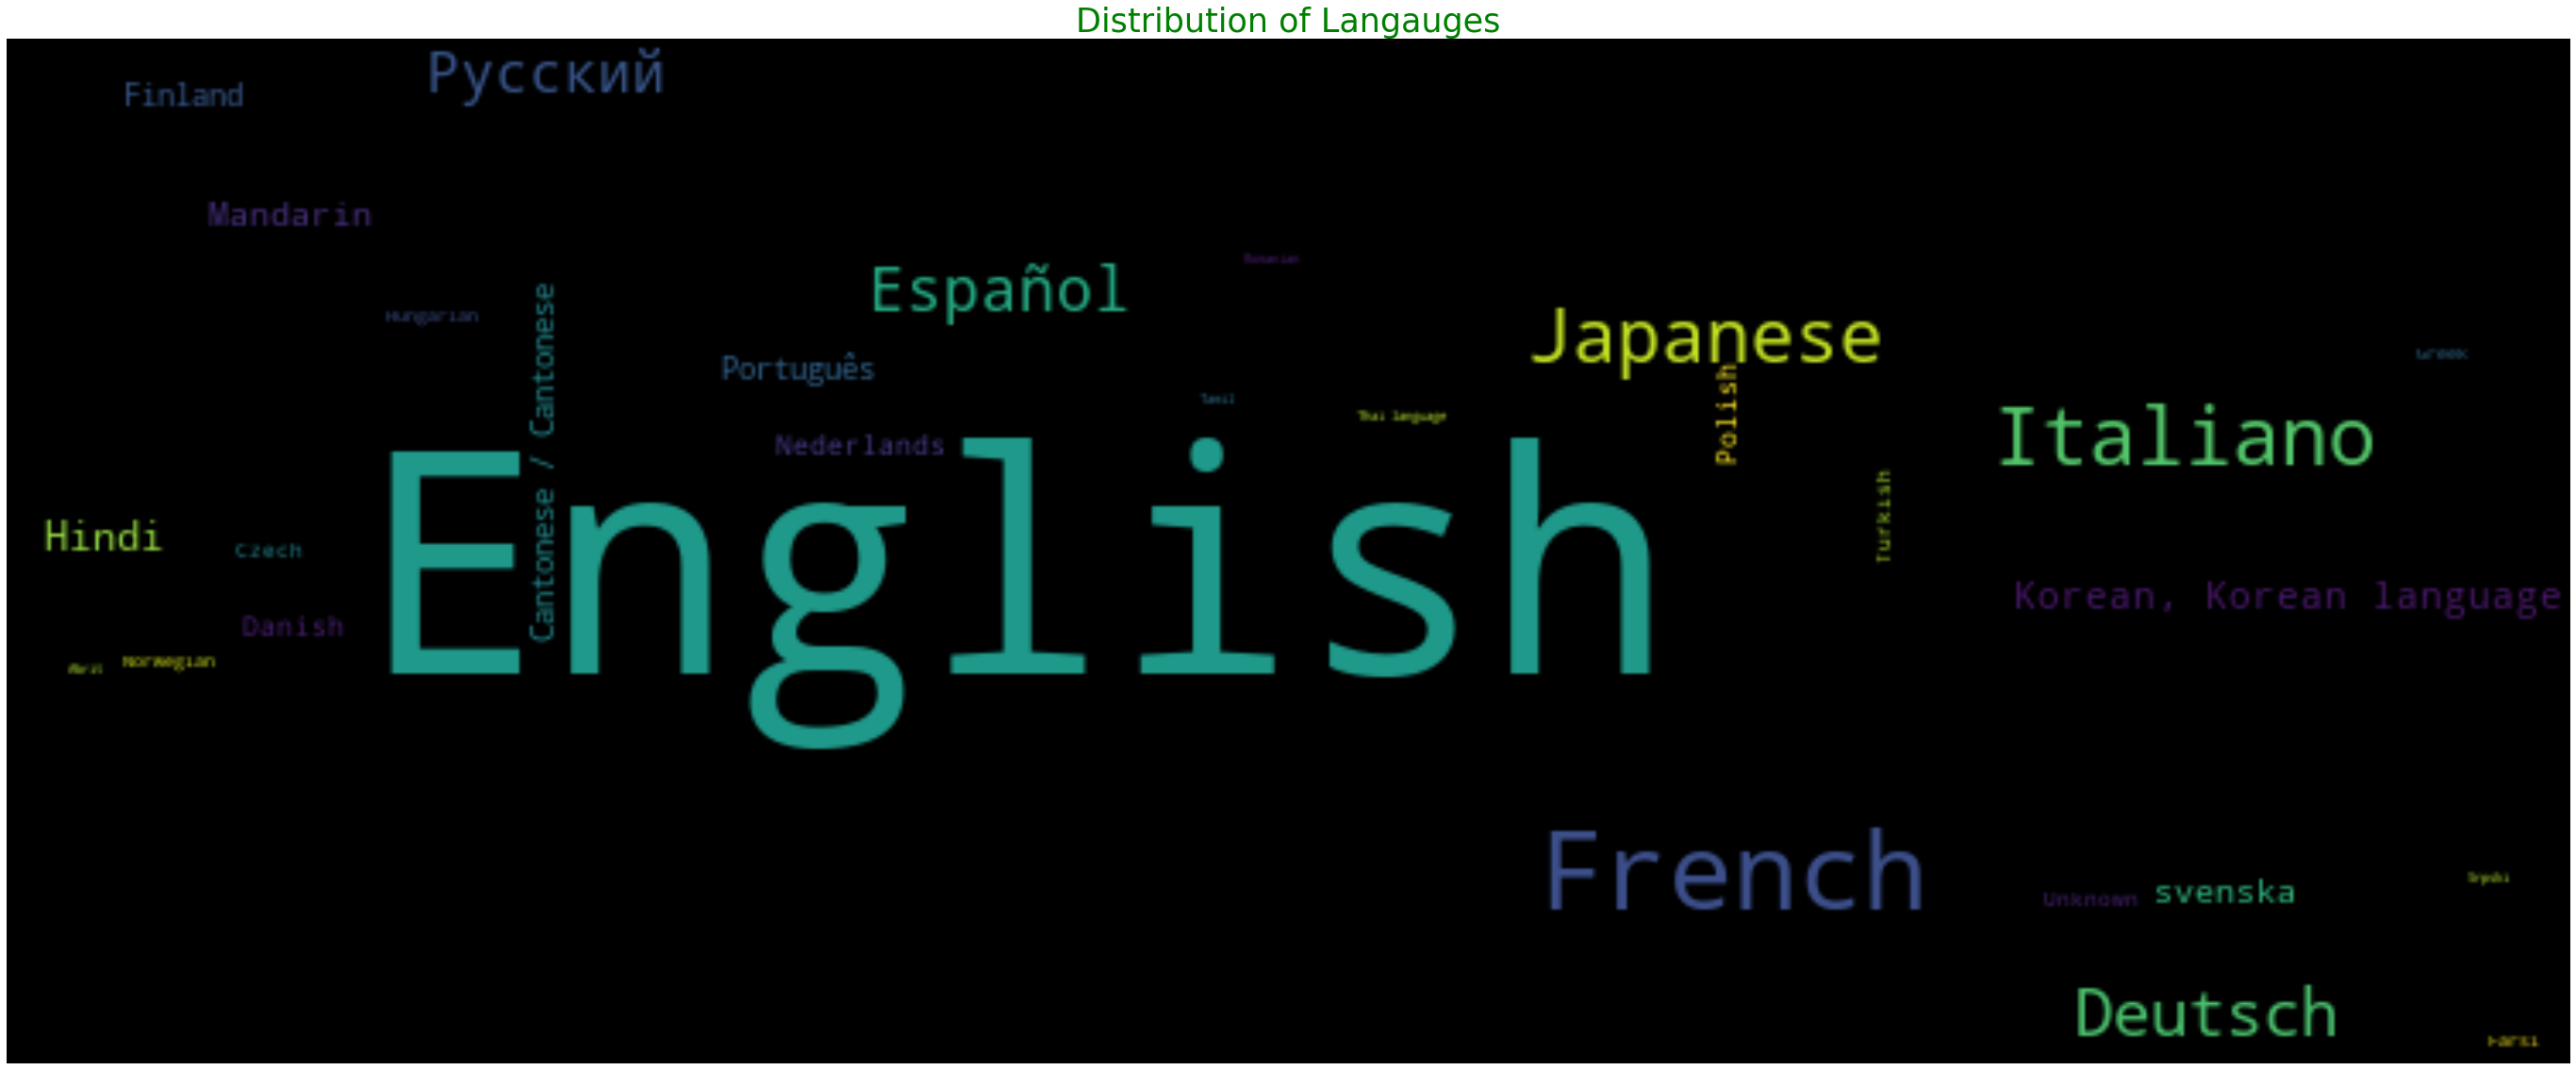

In [23]:
language_list = []
for language in movies_data['original_language'].unique():
  language_list.append(language)
language_type_occurences= count_types(movies_data, 'original_language', language_list)
language = dict()
for s in language_type_occurences:
    language[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(50, 20))
wordcloud = WordCloud(width=750,height=300, background_color='black', 
                      max_words=69,relative_scaling=0.7,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(language)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribution of Langauges",color='g',fontsize = 35)
plt.axis('off')
plt.savefig('Langs_Distribution.jpg')

plt.show()


**CORRELATION BETWEEN THE COLUMNS BUDGET, PROFIT, REVENUE, RUNTIME, VOTE_COUNT, VOTE_AVERAGE, RATING_COUNT, MEAN_RATING AND RELEASE YEAR:**

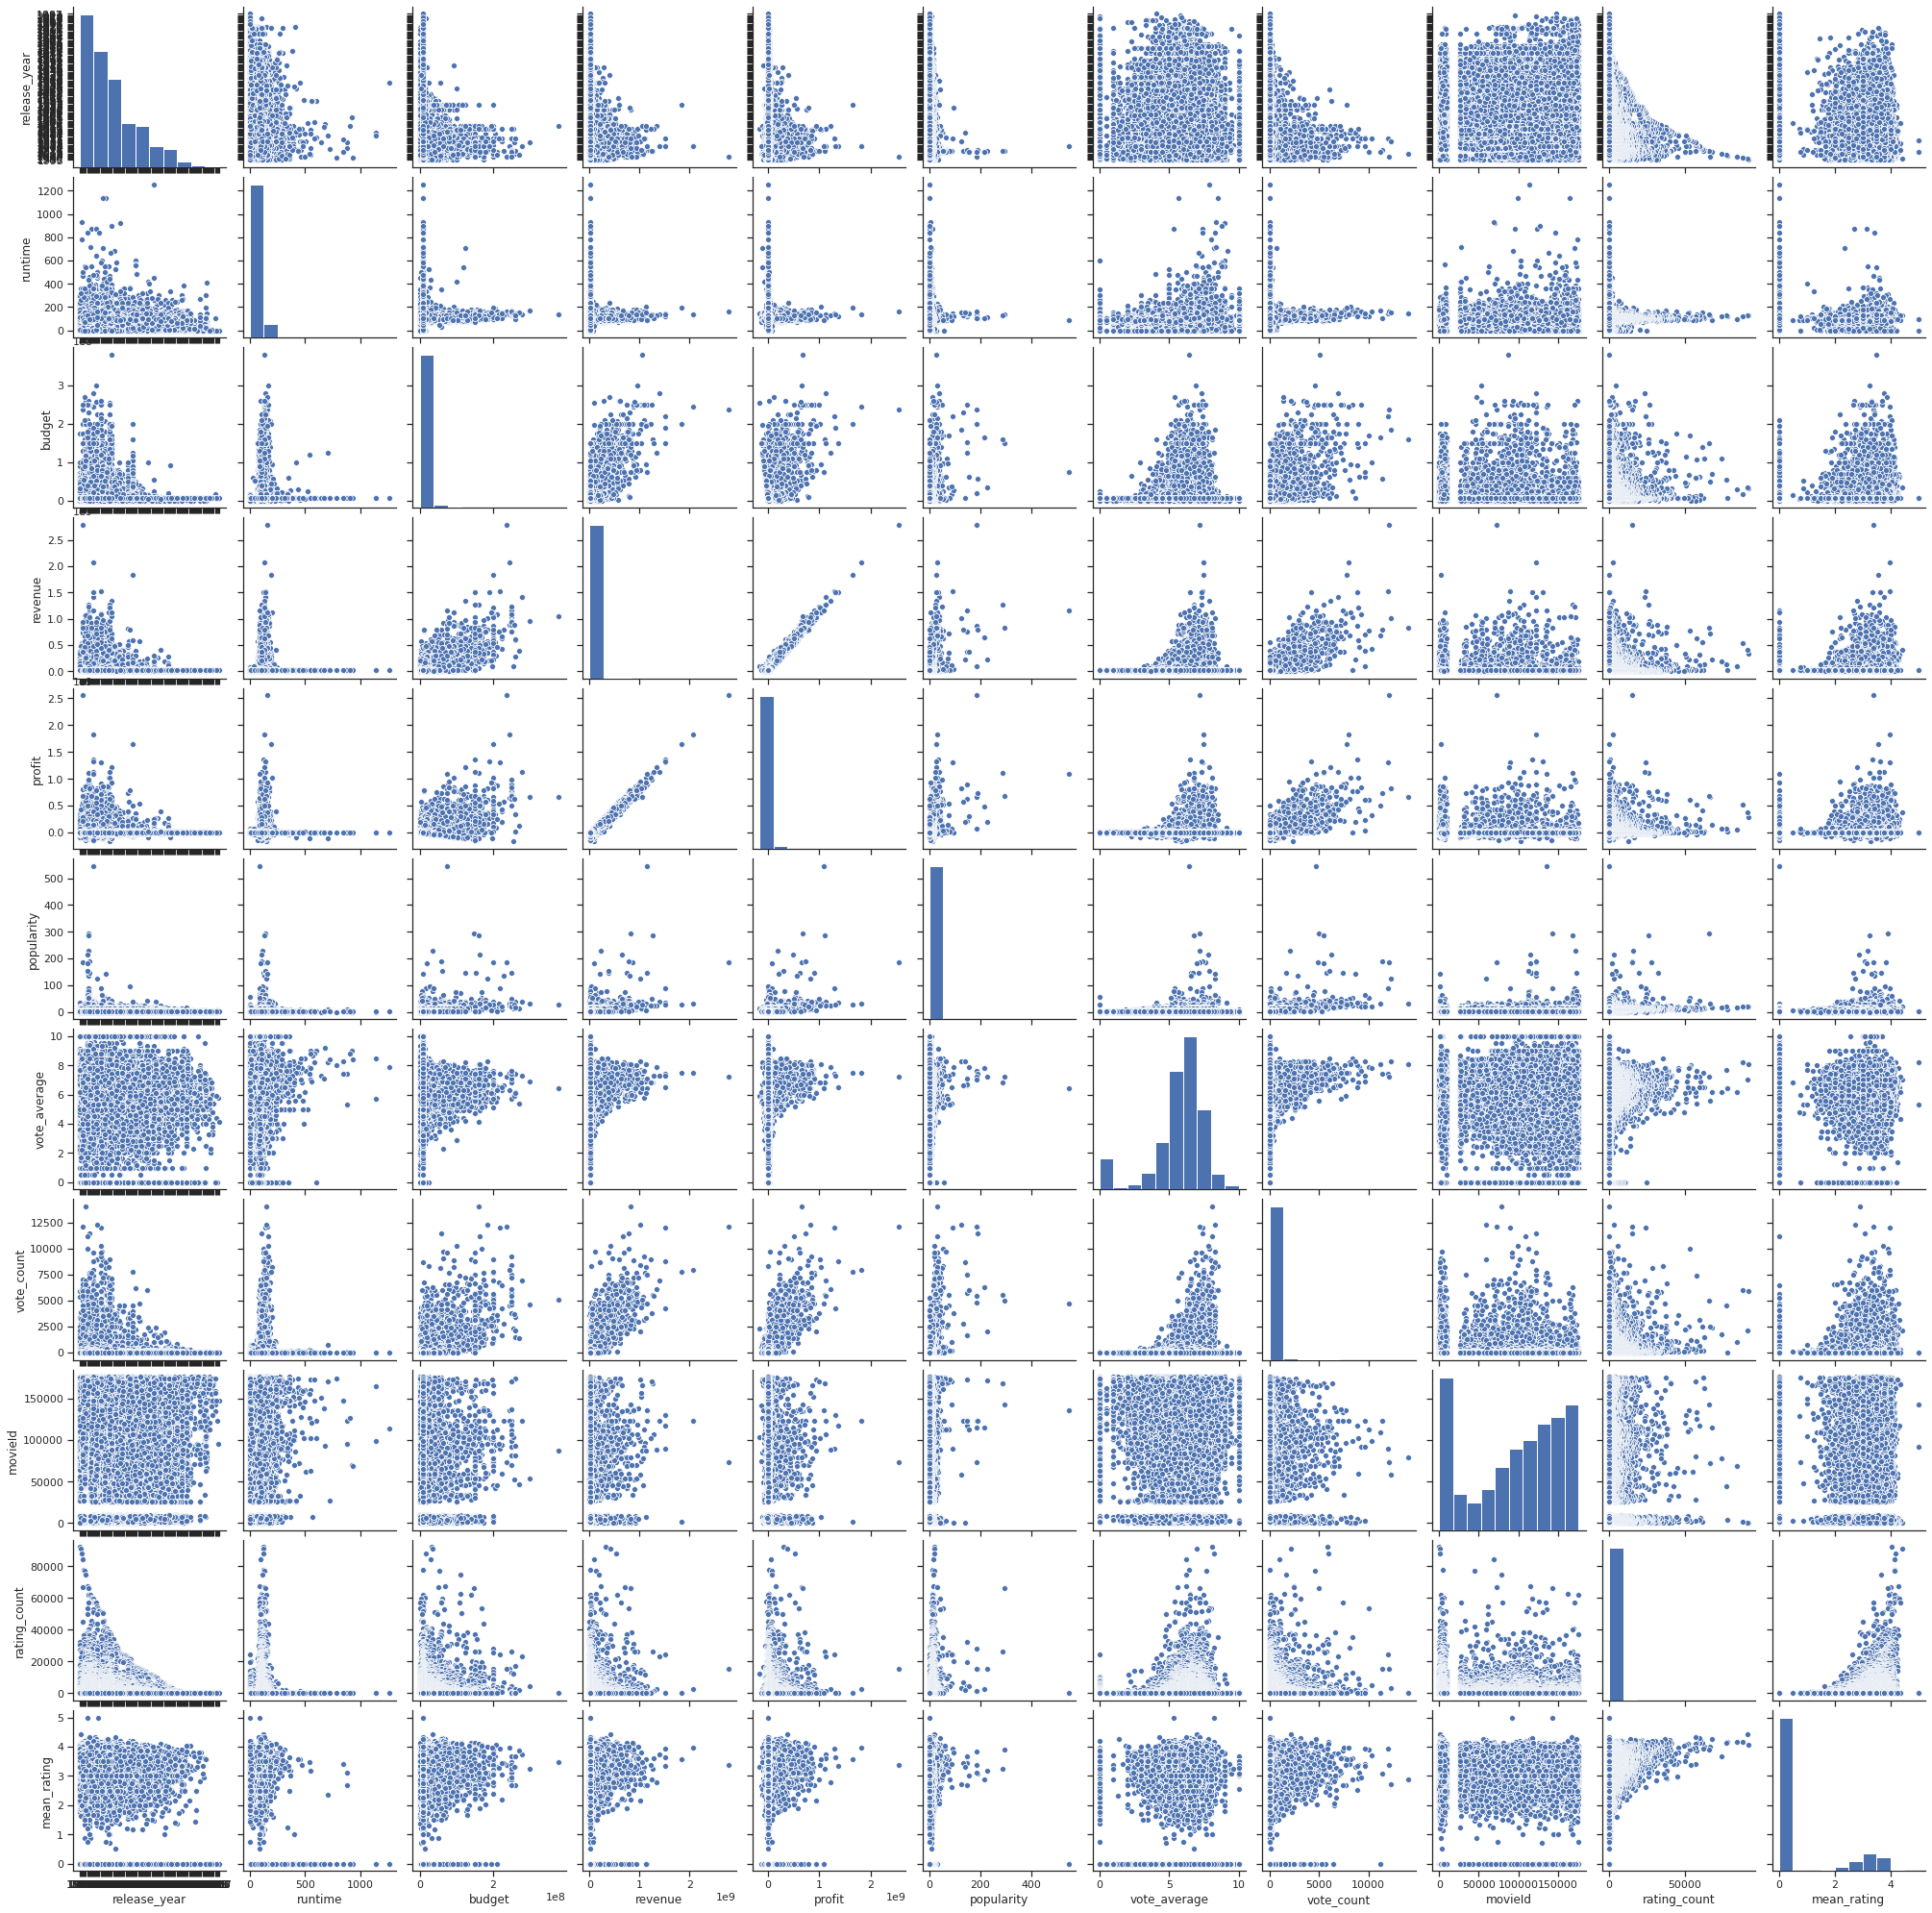

In [24]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(movies_data)
plt.savefig('Correlation_plot.jpg')

**TOP 20 MOVIES BASED ON POPULARITY :**

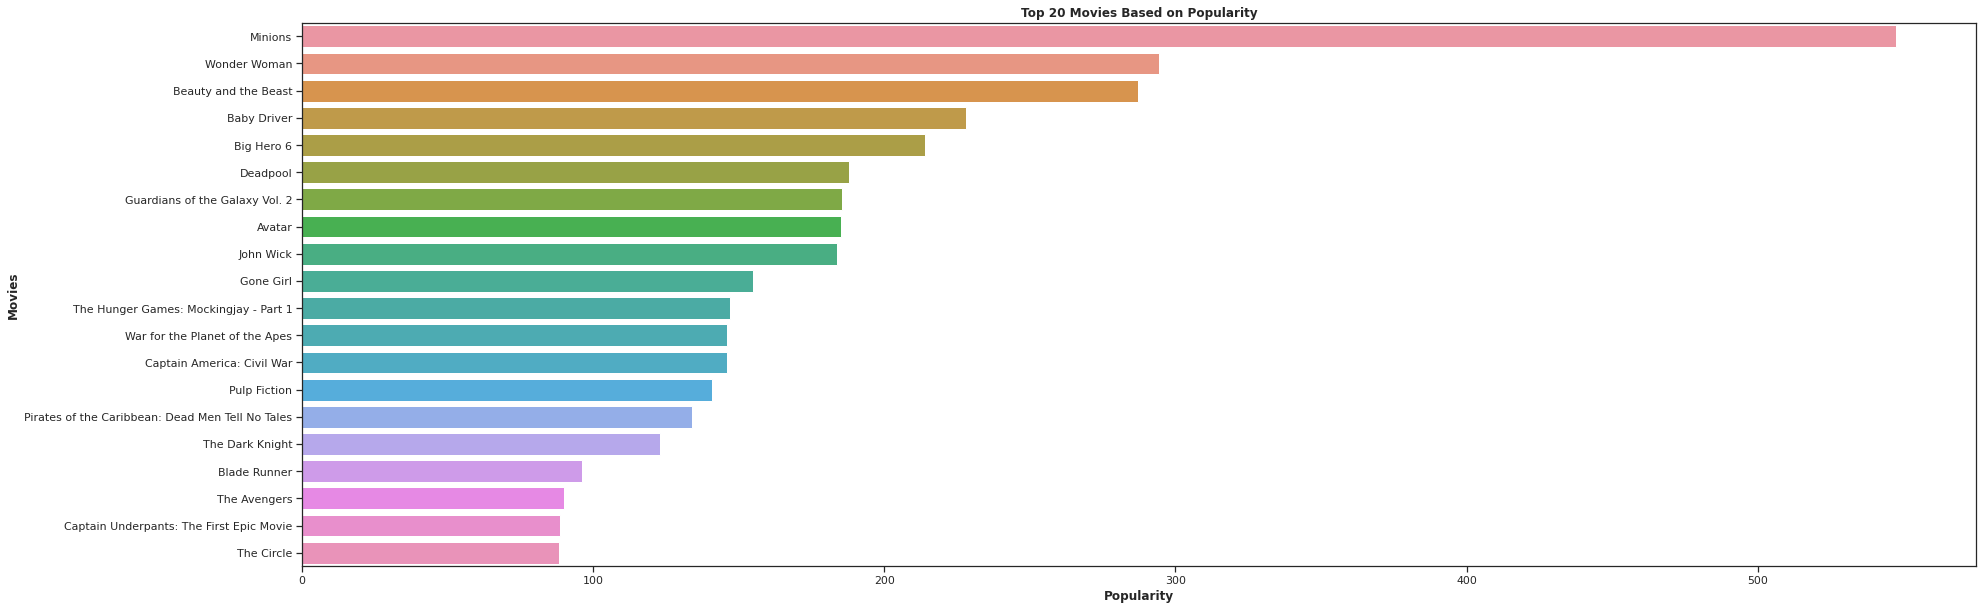

In [25]:
popularity_sort=movies_data.sort_values('popularity',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=popularity_sort['popularity'].head(20),y=popularity_sort['title'].head(20))
plt.title('Top 20 Movies Based on Popularity',weight='bold')
plt.xlabel('Popularity',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_popularity.jpg')

**TOP 20 MOVIES BASED ON VOTE COUNTS :**

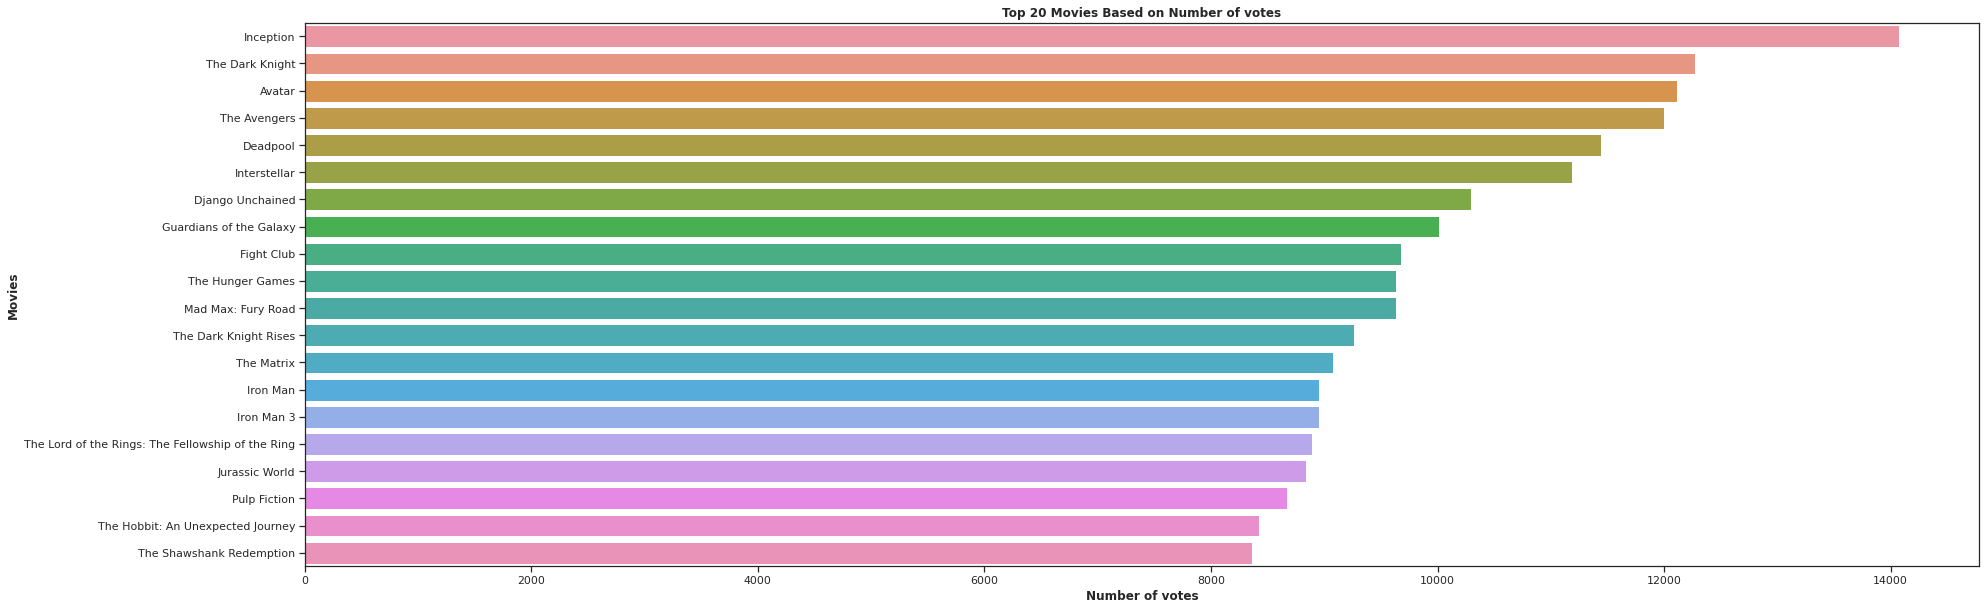

In [26]:
votecount_sort=movies_data.sort_values('vote_count',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=votecount_sort['vote_count'].head(20),y=votecount_sort['title'].head(20))
plt.title('Top 20 Movies Based on Number of votes',weight='bold')
plt.xlabel('Number of votes',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_votecount.jpg')

**TOP 20 MOVIES BASED ON NUMBER OF RATINGS RECIEVED:**

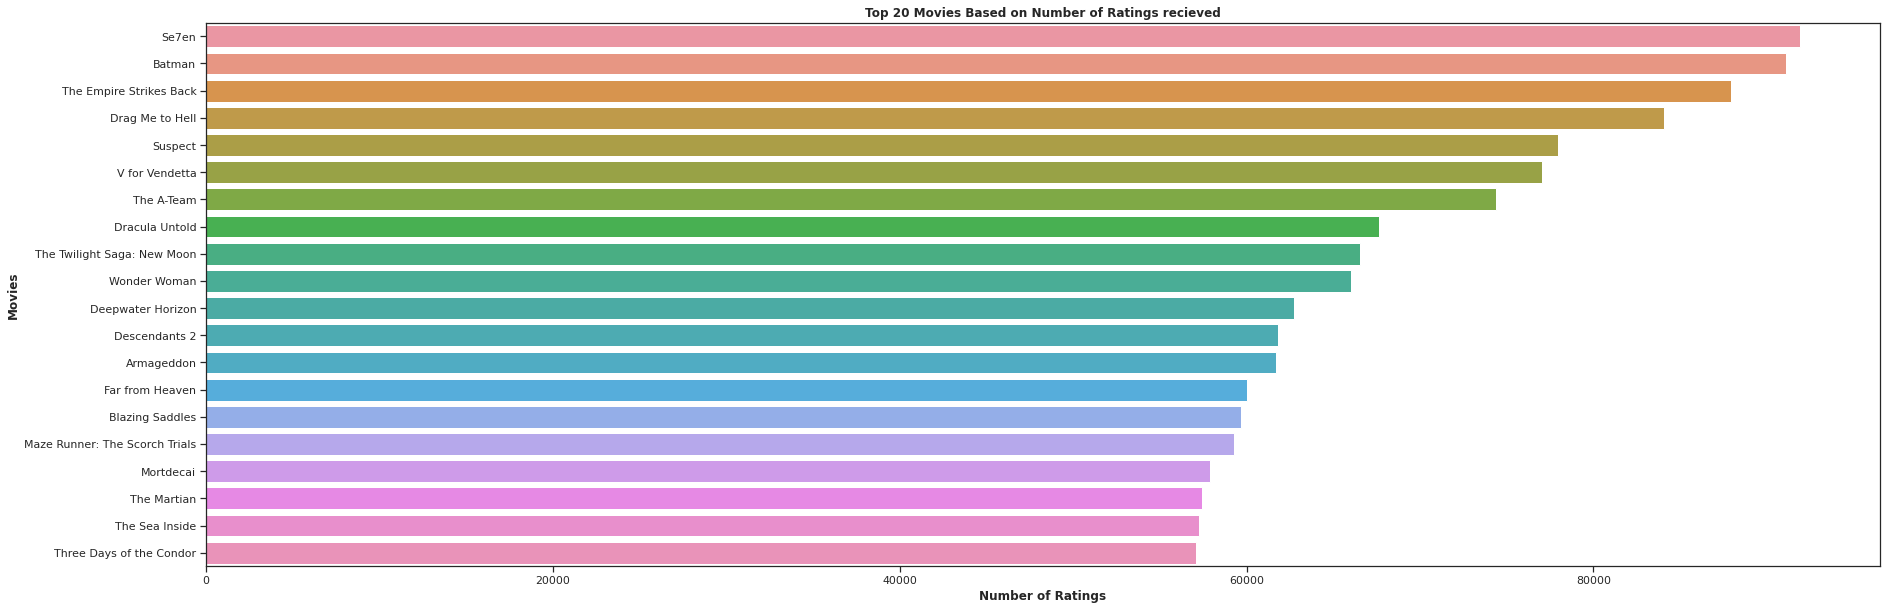

In [27]:
ratingcount_sort=movies_data.sort_values('rating_count',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=ratingcount_sort['rating_count'].head(20),y=ratingcount_sort['title'].head(20))
plt.title('Top 20 Movies Based on Number of Ratings recieved',weight='bold')
plt.xlabel('Number of Ratings',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_ratingcount.jpg')

**TOP 20 MOVIES BASED ON AVERAGE OF ALL VOTES RECIEVED:**

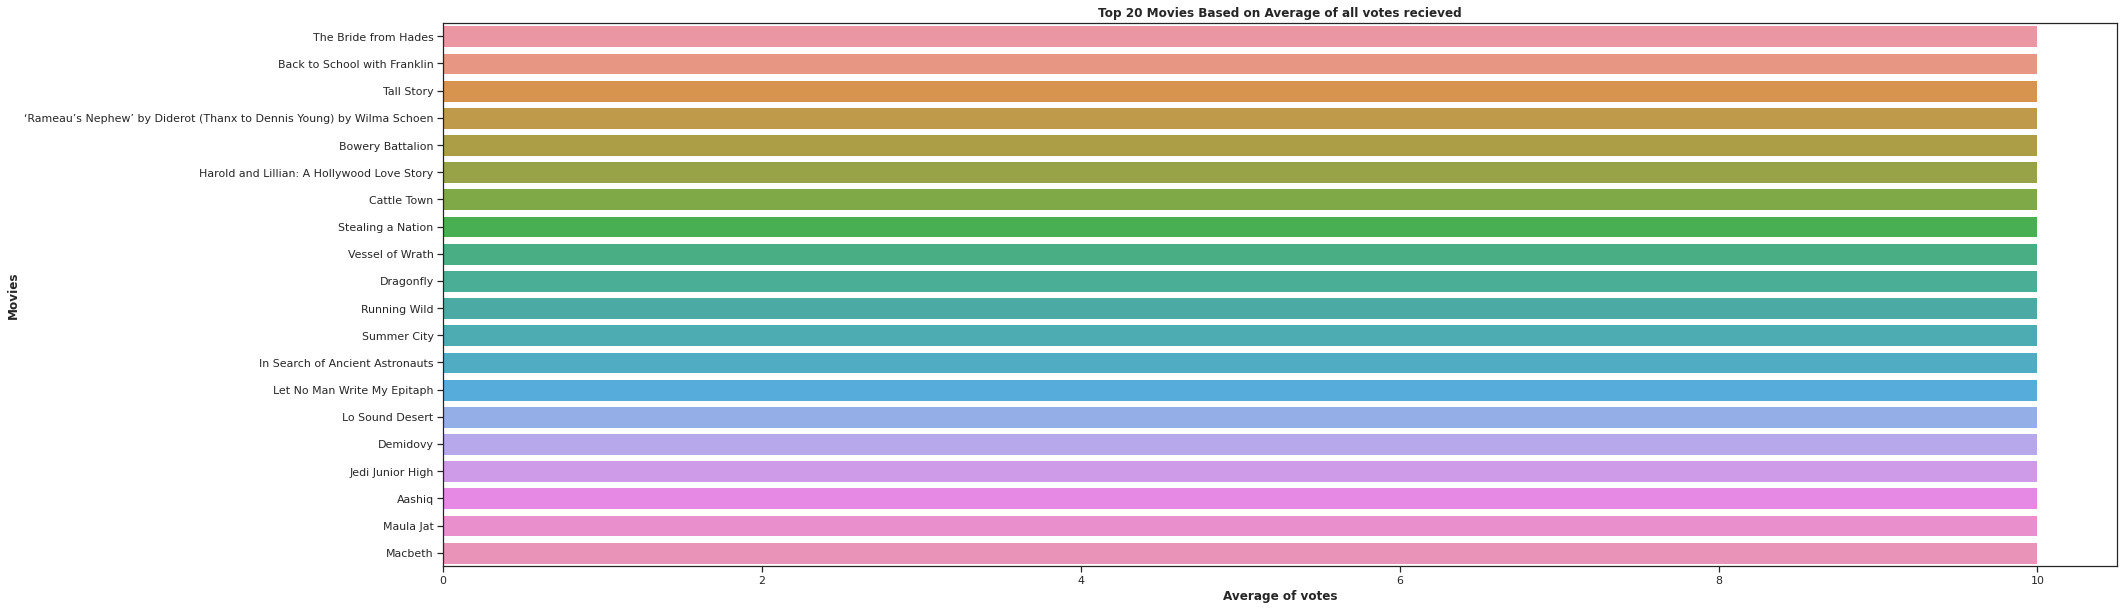

In [28]:
voteaverage_sort=movies_data.sort_values('vote_average',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=voteaverage_sort['vote_average'].head(20),y=voteaverage_sort['title'].head(20))
plt.title('Top 20 Movies Based on Average of all votes recieved',weight='bold')
plt.xlabel('Average of votes',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_voteaverage.jpg')

**TOP 20 MOVIES BASED ON MEAN OF RATINGS RECIEVED**

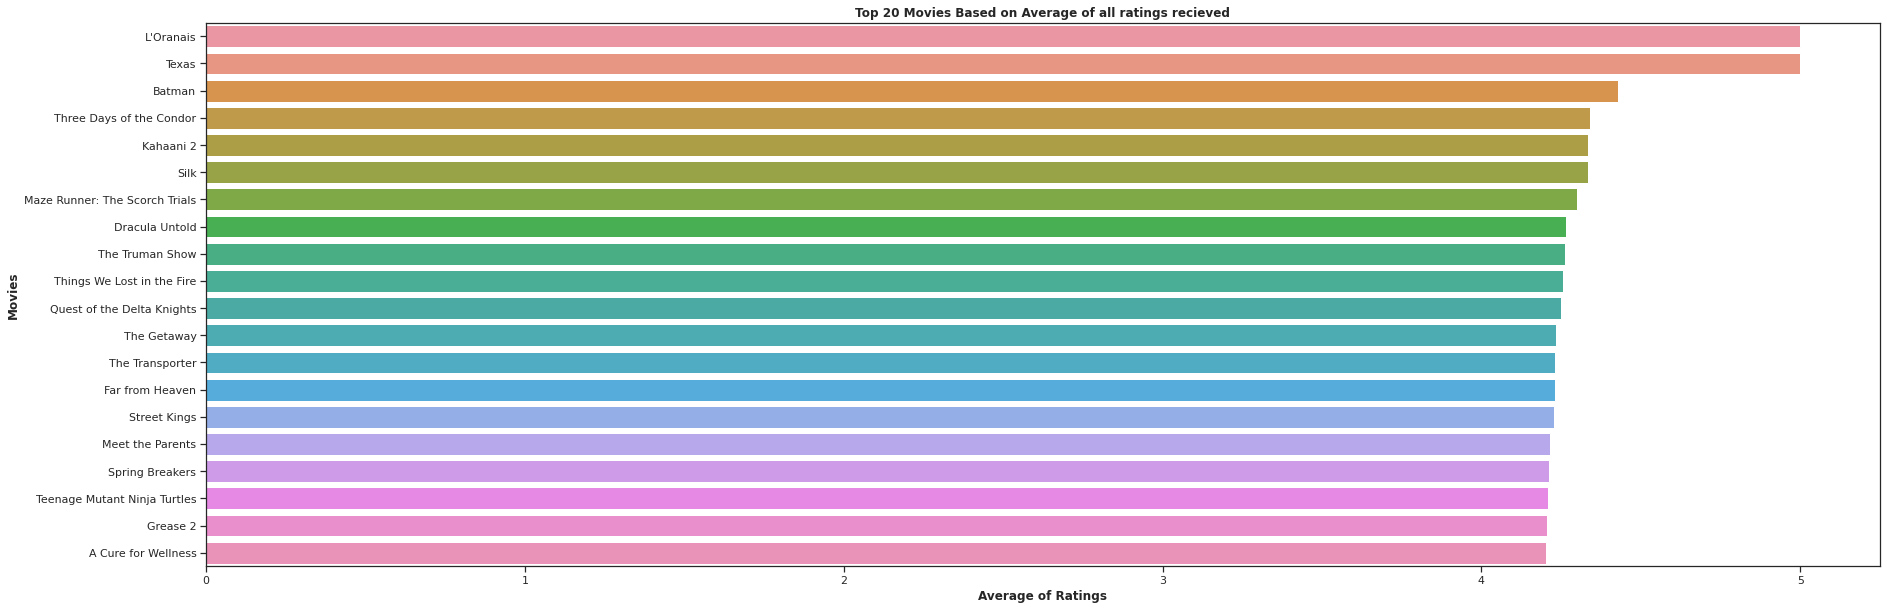

In [29]:
ratingaverage_sort=movies_data.sort_values('mean_rating',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=ratingaverage_sort['mean_rating'].head(20),y=ratingaverage_sort['title'].head(20))
plt.title('Top 20 Movies Based on Average of all ratings recieved',weight='bold')
plt.xlabel('Average of Ratings',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_ratingaverage.jpg')

**TOP 20 HIGH BUDGET MOVIES:**

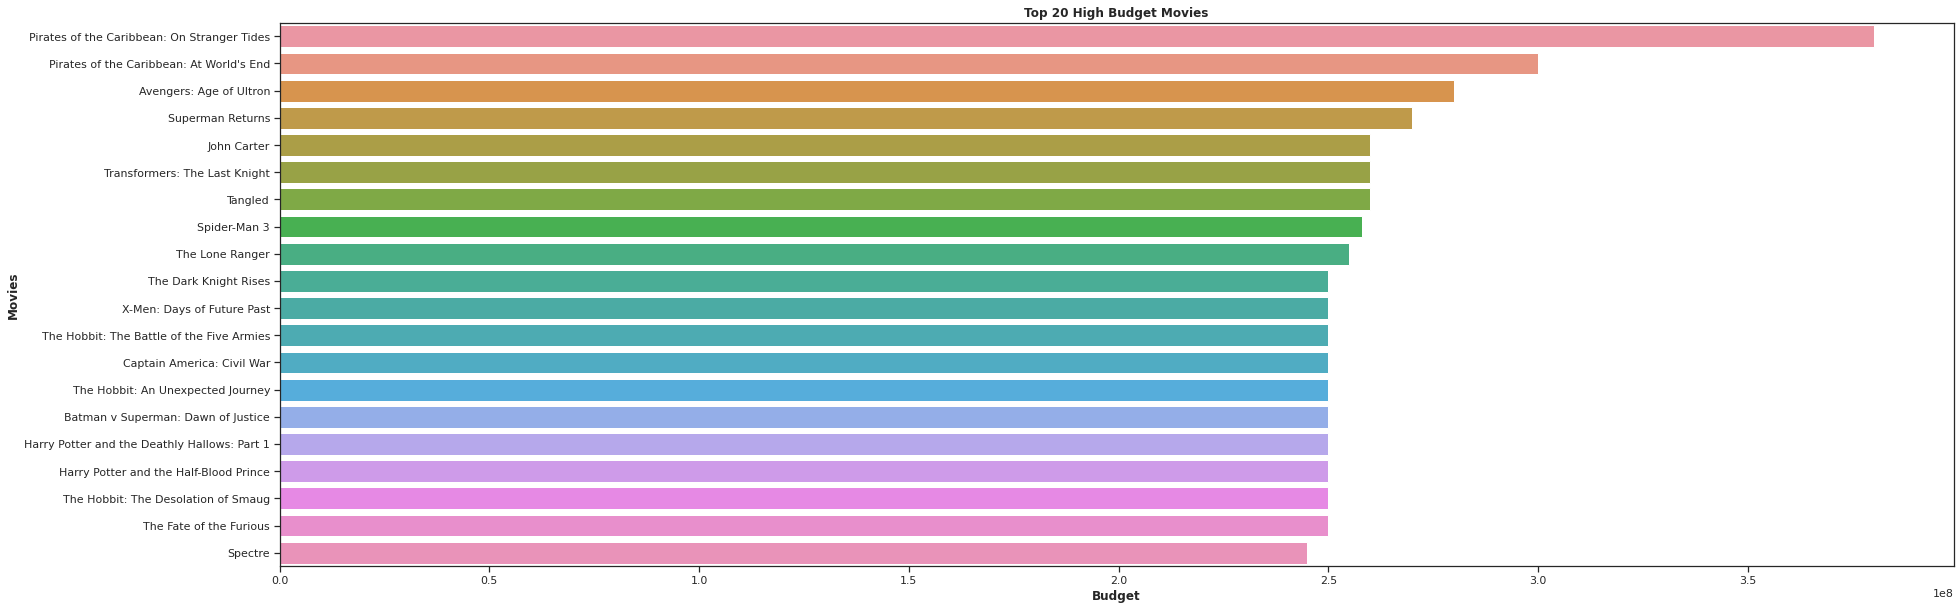

In [30]:
budget_sort=movies_data.sort_values('budget',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=budget_sort['budget'].head(20),y=budget_sort['title'].head(20))
plt.title('Top 20 High Budget Movies',weight='bold')
plt.xlabel('Budget',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_budget.jpg')

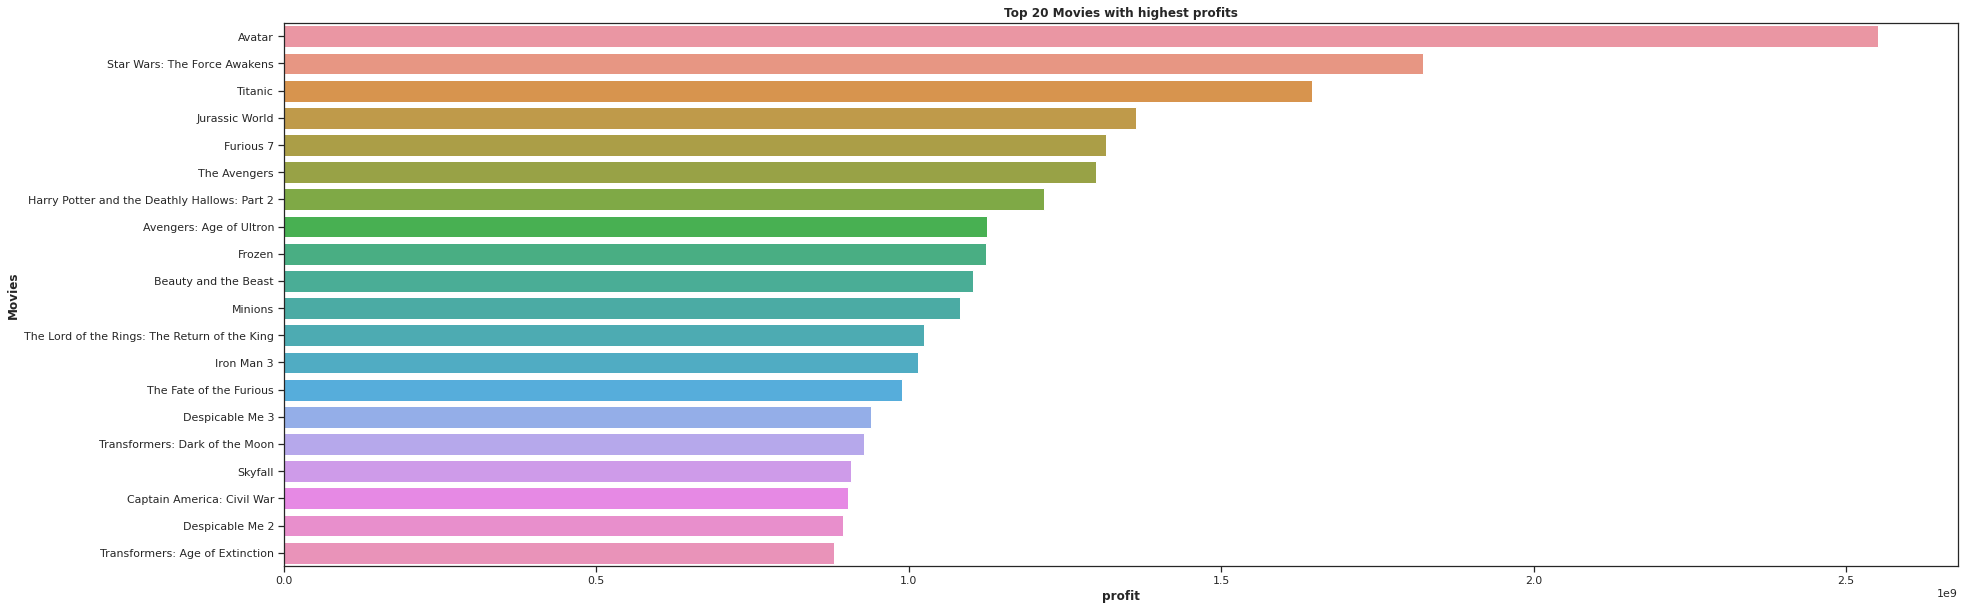

In [31]:
profit_sort=movies_data.sort_values('profit',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=profit_sort['profit'].head(20),y=profit_sort['title'].head(20))
plt.title('Top 20 Movies with highest profits',weight='bold')
plt.xlabel('profit',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_profit.jpg')